## COVID-19_Tests__Cases__and_Deaths__By_Town__-_ARCHIVE_20231023
## F.Rivera WK3

#### Library import & Column set

In [694]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stat
import seaborn as sns
pd.set_option('display.max_columns', 20)

#### Dataset assigned to wk3

In [695]:
wk3 = pd.read_csv('COVID-19_Tests__Cases__and_Deaths__By_Town__-_ARCHIVE_20231023.csv')
wk3

,Last update date,Town number,Town,Total cases,Confirmed cases,Probable cases,Case rate,Total deaths,Confirmed deaths,Probable deaths,People tested,Rate tested per 100k,Number of tests,Number of positives,Number of negatives,Number of indeterminates
0,1/17/2021,1,Andover,118,109.0,9.0,3652.0,2,2.0,0.0,1386.0,42897.0,3018.0,134.0,2882.0,2.0
1,1/17/2021,2,Ansonia,1236,1131.0,105.0,6602.0,20,13.0,7.0,8358.0,44645.0,22604.0,1451.0,21074.0,79.0
2,1/17/2021,3,Ashford,158,155.0,3.0,3708.0,3,3.0,0.0,1917.0,44989.0,4432.0,180.0,4249.0,3.0
3,1/17/2021,4,Avon,614,591.0,23.0,3355.0,63,52.0,11.0,8980.0,49066.0,23448.0,700.0,22712.0,36.0
4,1/17/2021,5,Barkhamsted,115,112.0,3.0,3173.0,1,1.0,0.0,1521.0,41970.0,3877.0,126.0,3743.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102240,6/24/2022,165,Windsor Locks,2702,2507.0,195.0,21021.0,44,40.0,4.0,10507.0,81741.0,44778.0,3347.0,41376.0,55.0
102241,6/24/2022,166,Wolcott,4089,3557.0,532.0,24652.0,64,54.0,10.0,14324.0,86357.0,71416.0,5163.0,66148.0,105.0
102242,6/24/2022,167,Woodbridge,1699,1519.0,180.0,19417.0,48,42.0,6.0,8668.0,99063.0,50559.0,2115.0,48373.0,71.0
102243,6/24/2022,168,Woodbury,1646,1367.0,279.0,17323.0,12,10.0,2.0,7918.0,83330.0,34243.0,2023.0,32192.0,28.0


#### Dataset Shape

In [696]:
wk3.shape

(102245, 16)

#### Columns and Data types

In [697]:
wk3.columns

Index(['Last update date', 'Town number', 'Town', 'Total cases ',
       'Confirmed cases', 'Probable cases', 'Case rate', 'Total deaths',
       'Confirmed deaths', 'Probable deaths', 'People tested',
       'Rate tested per 100k', 'Number of tests', 'Number of positives',
       'Number of negatives', 'Number of indeterminates'],
      dtype='object')

In [698]:
wk3.dtypes

Last update date             object
Town number                   int64
Town                         object
Total cases                   int64
Confirmed cases             float64
Probable cases              float64
Case rate                   float64
Total deaths                  int64
Confirmed deaths            float64
Probable deaths             float64
People tested               float64
Rate tested per 100k        float64
Number of tests             float64
Number of positives         float64
Number of negatives         float64
Number of indeterminates    float64
dtype: object

In [699]:
wk3.isna().sum()

Last update date                0
Town number                     0
Town                            0
Total cases                     0
Confirmed cases             11492
Probable cases              11492
Case rate                    3887
Total deaths                    0
Confirmed deaths            11492
Probable deaths             11492
People tested                8957
Rate tested per 100k         9633
Number of tests             11492
Number of positives         11492
Number of negatives         11492
Number of indeterminates    11492
dtype: int64

In [700]:
wk3.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
102240    False
102241    False
102242    False
102243    False
102244    False
Length: 102245, dtype: bool

#### Droping null values

In [701]:
wk3 = wk3.dropna().copy()
wk3

,Last update date,Town number,Town,Total cases,Confirmed cases,Probable cases,Case rate,Total deaths,Confirmed deaths,Probable deaths,People tested,Rate tested per 100k,Number of tests,Number of positives,Number of negatives,Number of indeterminates
0,1/17/2021,1,Andover,118,109.0,9.0,3652.0,2,2.0,0.0,1386.0,42897.0,3018.0,134.0,2882.0,2.0
1,1/17/2021,2,Ansonia,1236,1131.0,105.0,6602.0,20,13.0,7.0,8358.0,44645.0,22604.0,1451.0,21074.0,79.0
2,1/17/2021,3,Ashford,158,155.0,3.0,3708.0,3,3.0,0.0,1917.0,44989.0,4432.0,180.0,4249.0,3.0
3,1/17/2021,4,Avon,614,591.0,23.0,3355.0,63,52.0,11.0,8980.0,49066.0,23448.0,700.0,22712.0,36.0
4,1/17/2021,5,Barkhamsted,115,112.0,3.0,3173.0,1,1.0,0.0,1521.0,41970.0,3877.0,126.0,3743.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102240,6/24/2022,165,Windsor Locks,2702,2507.0,195.0,21021.0,44,40.0,4.0,10507.0,81741.0,44778.0,3347.0,41376.0,55.0
102241,6/24/2022,166,Wolcott,4089,3557.0,532.0,24652.0,64,54.0,10.0,14324.0,86357.0,71416.0,5163.0,66148.0,105.0
102242,6/24/2022,167,Woodbridge,1699,1519.0,180.0,19417.0,48,42.0,6.0,8668.0,99063.0,50559.0,2115.0,48373.0,71.0
102243,6/24/2022,168,Woodbury,1646,1367.0,279.0,17323.0,12,10.0,2.0,7918.0,83330.0,34243.0,2023.0,32192.0,28.0


#### Date format

In [784]:
wk3['Last update date'] = pd.to_datetime(wk3['Last update date'])

#### Changing Dtypes to  int

In [790]:
wk3['Confirmed_Cases'] = wk3['Confirmed_Cases'].astype(int)
wk3['Probable_Cases'] = wk3['Probable_Cases'].astype(int)
wk3['Case_Rate'] = wk3['Case_Rate'].astype(int)
wk3['Total_Deaths'] = wk3['Total_Deaths'].astype(int)
wk3['Confirmed_Deaths'] = wk3['Confirmed_Deaths'].astype(int)
wk3['Probable deaths'] = wk3['Probable deaths'].astype(int)
wk3['People tested'] = wk3['People tested'].astype(int)
wk3['Rate tested per 100k'] = wk3['Rate tested per 100k'].astype(int)
wk3['Number of tests'] = wk3['Number of tests'].astype(int) 
wk3['Number of positives'] = wk3['Number of positives'].astype(int)       
wk3['Number of negatives'] = wk3['Number of negatives'].astype(int)    
wk3['Number of indeterminates'] = wk3['Number of indeterminates'].astype(int)

In [791]:
wk3.dtypes

Last update date            datetime64[ns]
Town number                          int64
Town                                object
Total_Cases                          int64
Confirmed_Cases                      int32
Probable_Cases                       int32
Case_Rate                            int32
Total_Deaths                         int32
Confirmed_Deaths                     int32
Probable deaths                      int32
People tested                        int32
Rate tested per 100k                 int32
Number of tests                      int32
Number of positives                  int32
Number of negatives                  int32
Number of indeterminates             int32
zscoreC                            float64
zscoreD                            float64
dtype: object

#### Five Number Summary and Central tendency

In [792]:
wk3[['Total_Cases', 'Confirmed_Deaths']].describe()

,Total_Cases,Confirmed_Deaths
count,90753.000000,90753.000000
mean,2095.054356,36.936762
std,4082.136179,57.318724
min,0.000000,0.000000
25%,191.000000,2.000000
50%,700.000000,13.000000
75%,2111.000000,44.000000
max,42752.000000,442.000000


In [798]:
wk3[['Total_Cases',
       'Confirmed_Cases', 'Probable_Cases', 'Case_Rate', 'Total_Deaths',
       'Confirmed_Deaths', 'Probable deaths', 'People tested',
       'Rate tested per 100k', 'Number of tests', 'Number of positives',
       'Number of negatives', 'Number of indeterminates']].median()

Total_Cases                   700.0
Confirmed_Cases               644.0
Probable_Cases                 52.0
Case_Rate                    6996.0
Total_Deaths                   17.0
Confirmed_Deaths               13.0
Probable deaths                 3.0
People tested                6025.0
Rate tested per 100k        62315.0
Number of tests             18388.0
Number of positives           833.0
Number of negatives         17512.0
Number of indeterminates       18.0
dtype: float64

In [799]:
wk3[['Total_Cases',
       'Confirmed_Cases', 'Probable_Cases', 'Case_Rate', 'Total_Deaths',
       'Confirmed_Deaths', 'Probable deaths', 'People tested',
       'Rate tested per 100k', 'Number of tests', 'Number of positives',
       'Number of negatives', 'Number of indeterminates']].mode()

,Total_Cases,Confirmed_Cases,Probable_Cases,Case_Rate,Total_Deaths,Confirmed_Deaths,Probable deaths,People tested,Rate tested per 100k,Number of tests,Number of positives,Number of negatives,Number of indeterminates
0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,357.0,33903.0,182,6.0,108.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,NaN,238.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,646,NaN,NaN,NaN


In [801]:
wk3[['Total_Cases',
       'Confirmed_Cases', 'Probable_Cases', 'Case_Rate', 'Total_Deaths',
       'Confirmed_Deaths', 'Probable deaths', 'People tested',
       'Rate tested per 100k', 'Number of tests', 'Number of positives',
       'Number of negatives', 'Number of indeterminates']].mean()

Total_Cases                  2095.054356
Confirmed_Cases              1903.153736
Probable_Cases                191.900587
Case_Rate                    8205.134883
Total_Deaths                   45.237325
Confirmed_Deaths               36.936762
Probable deaths                 8.300563
People tested               12433.947693
Rate tested per 100k        56437.165835
Number of tests             49617.158110
Number of positives          2559.576697
Number of negatives         46999.232069
Number of indeterminates       58.349344
dtype: float64

In [802]:
wk3.rename(columns={'Total cases ':'Total_Cases', 'Confirmed cases':'Confirmed_Cases', 'Probable cases':'Probable_Cases', 'Case rate':'Case_Rate', 'Total deaths':'Total_Deaths', 'Confirmed deaths':'Confirmed_Deaths'},inplace=True)

### Standarizing data

#### Z-score standarization
#### scaled values= value-mean/sd

In [803]:
wk3['zscoreC'] = (wk3.Total_Cases - wk3.Total_Cases.mean()) / wk3.Total_Cases.std()

In [804]:
wk3['zscoreD'] = (wk3.Confirmed_Deaths - wk3.Confirmed_Deaths.mean()) / wk3.Confirmed_Deaths.std()

#### Rejecting all values with zscores higher than 3 and lower than -3

In [805]:
wk3C = wk3[(wk3.zscoreC>-3) & (wk3.zscoreC<3)]

In [806]:
wk3D = wk3C[(wk3C.zscoreD>-3) & (wk3C.zscoreD<3)]

In [807]:
wk3D.shape[0] - wk3.shape[0]

-2294

In [808]:
wk3f = wk3D.copy()

#### Univariate analysis

<Axes: ylabel='Frequency'>

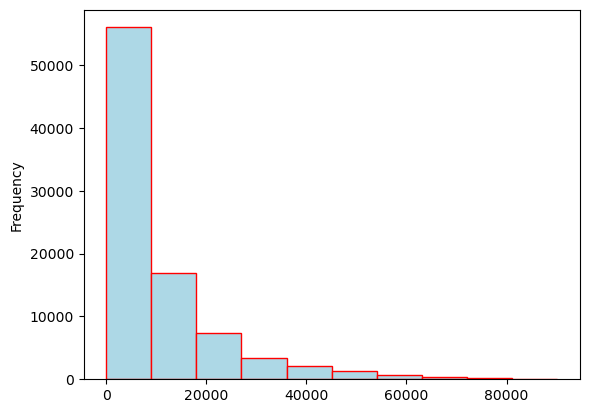

In [809]:
wk3f['People tested'].plot(kind='hist',color= 'lightblue', edgecolor= 'red', bins=10)


Text(0.5, 1.0, 'Total Cases Distribution')

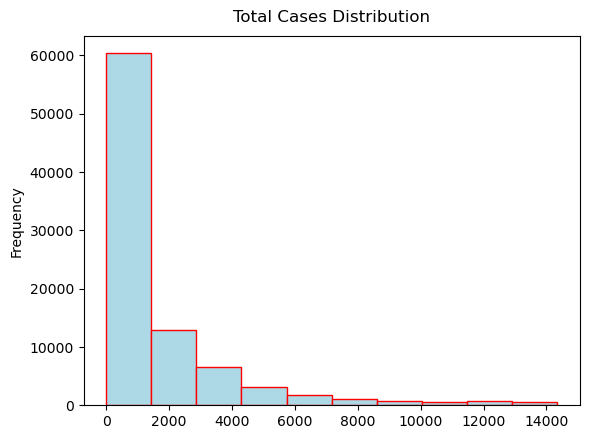

In [810]:
wk3f['Total_Cases'].plot(kind='hist',color= 'lightblue', edgecolor= 'red', bins=10)
plt.title('Total Cases Distribution', pad = 10)

Text(0.5, 1.0, 'Confirmed Deaths Distribution')

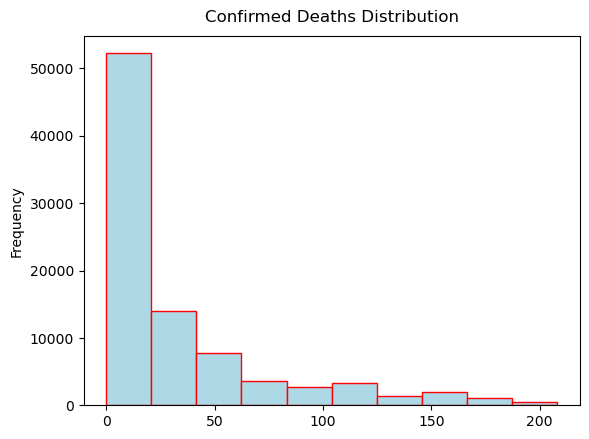

In [811]:
wk3f['Confirmed_Deaths'].plot(kind='hist', color= 'lightblue', edgecolor= 'red', bins=10)
plt.title('Confirmed Deaths Distribution', pad = 10)

In [812]:
wk3f[['Total_Cases','Confirmed_Deaths']].skew()

Total_Cases         2.677995
Confirmed_Deaths    1.851864
dtype: float64

In [813]:
wk3f[['Total_Cases','Confirmed_Deaths']].kurtosis()

Total_Cases         8.124083
Confirmed_Deaths    2.871820
dtype: float64

In [814]:
wk3f['Town'].value_counts()

Town
Andover       537
Oxford        537
Plainville    537
Plymouth      537
Pomfret       537
             ... 
New Haven     272
Bridgeport    180
Hartford      170
Stamford      155
Waterbury     152
Name: count, Length: 169, dtype: int64

In [815]:
ByT = (wk3f.groupby(['Town'])[['Total_Cases', 'Confirmed_Deaths']].sum()) \
                  .nlargest(20,['Total_Cases'])
ByT

,Total_Cases,Confirmed_Deaths
Town,,
Danbury,3596273,55592
East Hartford,3419222,58053
Hamden,3290637,82980
West Haven,3273781,52870
Norwalk,3268928,67948
Bristol,3178607,58557
Stratford,3074038,60121
Greenwich,2895843,35498
New Britain,2792369,55927


In [816]:
wk3f['month'] = wk3f['Last update date'].dt.month
wk3f['ByM'] = wk3f['Last update date'].dt.to_period('M')
CD_ByM = wk3f.groupby(['ByM'])['Confirmed_Deaths',].sum()
CD_ByM.head(100)

,Confirmed_Deaths
ByM,
2020-05,3111
2020-06,100237
2020-07,77165
2020-08,78513
2020-09,75521
2020-10,76718
2020-11,80736
2020-12,91368
2021-01,105055


In [817]:
CC_ByM = wk3f.groupby(['ByM'])['Total_Cases',].sum()
CC_ByM.head(50)

,Total_Cases
ByM,
2020-05,42503
2020-06,1344424
2020-07,1050633
2020-08,1123735
2020-09,1160472
2020-10,1334872
2020-11,1952623
2020-12,3167308
2021-01,4305453


#### Analysis Case_Rate per 1000,000

In [818]:
std = wk3f['Case_Rate'].std()

In [819]:
avg = wk3f['Case_Rate'].mean()
med = wk3f['Case_Rate'].median()

In [820]:
avg+std

14311.787131701989

In [821]:
avg-std

1515.8883111585465

In [822]:
avg-(std*2)

-4882.061099113174

In [823]:
avg-(std*3)

-11280.010509384894

In [824]:
avg+(std*2)

20709.73654197371

In [825]:
avg+(std*3)

27107.68595224543

<Figure size 3000x1000 with 0 Axes>

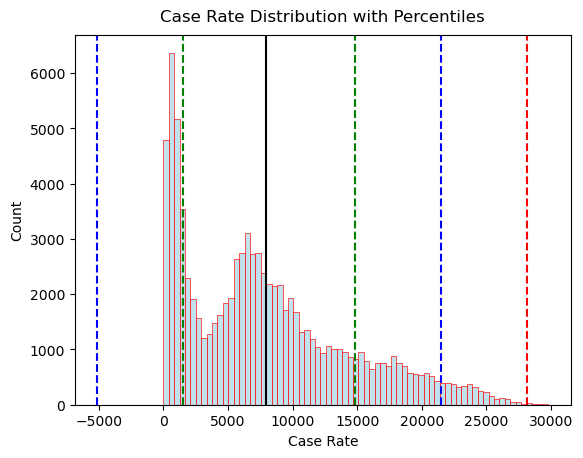

<Figure size 3000x1000 with 0 Axes>

In [826]:
sns.histplot(x = wk3f['Case_Rate'], color = 'lightblue', edgecolor = 'red')
plt.title('Case Rate Distribution with Percentiles', pad = 10)


plt.axvline(x = -5101, ymin = 0, ymax = wk3f['Case_Rate'].max(),  linestyle = '--', color = "blue")
plt.axvline(x = 1552, ymin = 0, ymax = wk3f['Case_Rate'].max(),  linestyle = '--', color = "green")
plt.axvline(x = avg, ymin = 0, ymax = wk3f['Case_Rate'].max(),  color = 'black')
plt.axvline(x = 14858, ymin = 0, ymax = wk3f['Case_Rate'].max(), linestyle = '--', color = "green")
plt.axvline(x = 21511, ymin = 0, ymax = wk3f['Case_Rate'].max(), linestyle = '--', color = "blue")
plt.axvline(x = 28164, ymin = 0, ymax = wk3f['Case_Rate'].max(),  linestyle = '--', color = "red")
plt.xlabel('Case Rate')
TD.set_yticks([0, 2500, 5000, 7000])

plt.figure(figsize = (30,10))

[Text(0.5, 0, 'By Month'), Text(0, 0.5, 'Total Cases')]

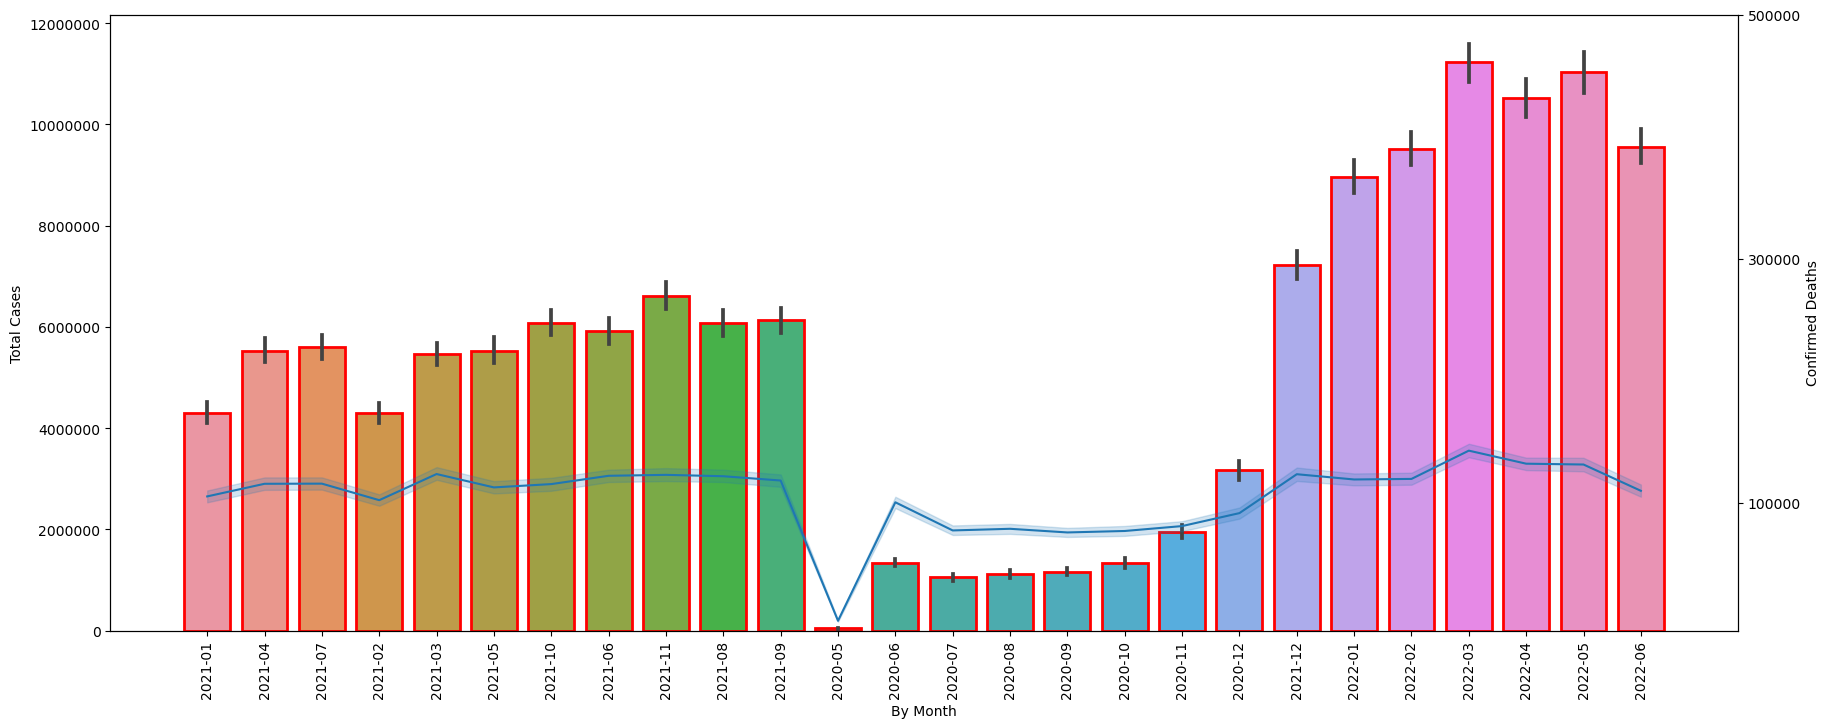

In [827]:
fig, ax = plt.subplots(figsize=(21, 8))
ax1 = plt.ticklabel_format(style = 'plain')
ax1 = sns.barplot(data = wk3f, y = 'Total_Cases', x = 'ByM', linewidth = 2, edgecolor = 'red',
                  estimator=np.sum)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x=wk3f['ByM'].astype(str), y=wk3['Confirmed_Deaths'],
                  estimator=np.sum)
 
ax2.set_yticks([100000, 300000, 500000])
ax2.set(ylabel='Confirmed Deaths')
ax1.tick_params(axis='x', labelrotation=90)
ax1.set(xlabel='By Month', ylabel='Total Cases')